<a href="https://colab.research.google.com/github/jonmessier/Coding-Dojo/blob/main/Learn_WK15_Use_CDF_to_Calculate_Probabilities_practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro
**Use CDF to Calculate Probabilities (Practice)**\
Jon Messier \
3/6/2023

We will use the [human height data set](https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv):

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)


Save your code to your Github repository and submit the link

#Class/Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv"
df = pd.read_csv(url)

#Plot Functions



In [3]:
def plot_dist (data, low, high):
  fig,ax = plt.subplots(figsize=(10,6))
  sns.histplot(x=data, stat='density',kde=True)
  ax.set_title(f"Distribution of {data.name}")
  ax.axvline(low, color= 'black')
  ax.axvline(high, color ='black')
  ax.axvspan(low, high, color ='yellow', zorder = 0);

In [4]:
def plot_cdf(data):
  mean = np.mean(data)
  fig,ax = plt.subplots(figsize=(10,6))
  sns.histplot(x=data, stat='density',kde=True,cumulative=True)
  ax.set_title(f"Cumulative Distribution of {data.name}")
  ax.axvline(mean,color='k',ls='--');

In [5]:
def plot_cdf_normal(data, low, high):
  mean = np.mean(data)
  std = np.std(data)
  min = np.min(data)
  max = np.max(data) 

  # Set the range and spacing for our normal curve
  x_range = np.linspace(min, max,1000)
#  pdf = stats.norm.pdf(x_range, loc=mean, scale=std)
  cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

  fig, ax = plt.subplots(figsize=(12,6))
  sns.histplot(x=data, stat='density', cumulative = True)
  ax.plot(x_range,cdf)
  ax.axvline(low, color= 'black')
  ax.axvline(high, color ='black')
  ax.axvspan(low, high, color ='yellow', zorder = 0)
  ax.set_title(f'Normal {data.name} CDF w/ Range of Interest');

In [6]:
def plot_pdf_normal(data, low, high):
  mean = np.mean(data)
  std = np.std(data)
  min = np.min(data)
  max = np.max(data) 

  # Set the range and spacing for our normal curve
  x_range = np.linspace(min, max,1000)
  pdf = stats.norm.pdf(x_range, loc=mean, scale=std)
  
  fig, ax = plt.subplots(figsize=(12,6))
  sns.histplot(x=data, stat='density')
  ax.plot(x_range,pdf)
  ax.axvline(low, color= 'black')
  ax.axvline(high, color ='black')
  ax.axvspan(low, high, color ='yellow', zorder = 0)
  ax.set_title(f'Normal {data.name} PDF w/ Range of Interest')

#Data Inspection

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


#Exploratory Analysis

In [10]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

## Females

###Q1 Female Height between 55.0 and 56.0 inches

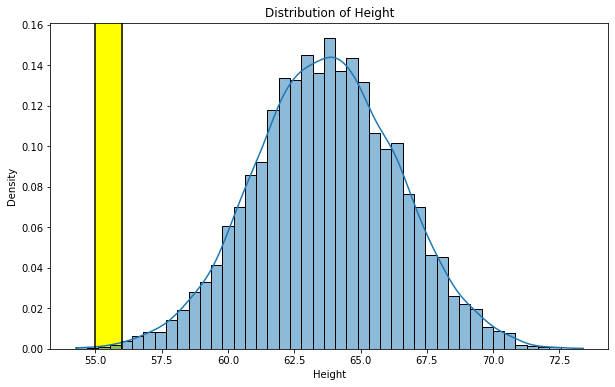

In [11]:
#set data
data = females["Height"]

#Set range
low = 55.0
high = 56

#plot
plot_dist(data, low, high)

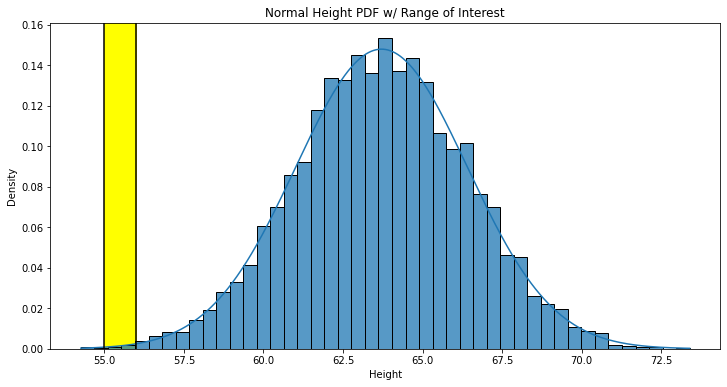

In [12]:
plot_pdf_normal(data,low, high)

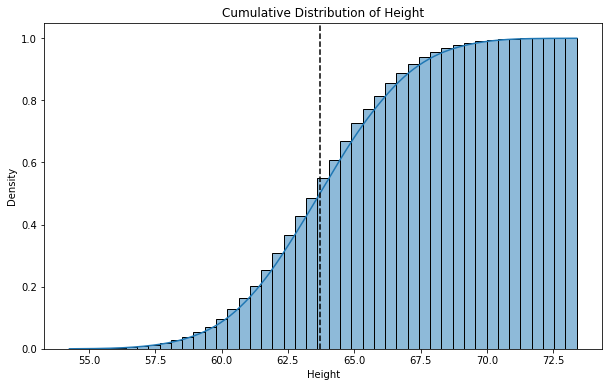

In [13]:
plot_cdf(data)

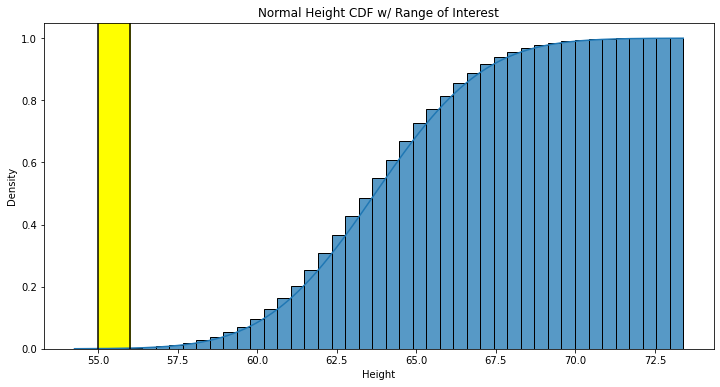

In [14]:
plot_cdf_normal(data,low,high)

In [15]:
## we subtract to find the probability of a value occurring in the range
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data) 

stats.norm.cdf(high, loc=mean,scale=std) - stats.norm.cdf(low,loc=mean, scale=std)


0.0015043054289559745

###Q2. Female height less than 60 inches

In [16]:
stats.norm.cdf(60, loc=mean,scale=std)

0.0844649272520746

###Q3 Is greater than the mean?
Intuitively I would say 50% proability to be greater than the mean of a normally distribution.

In [17]:
stats.norm.cdf(mean, loc=mean,scale=std)

0.5

##Males


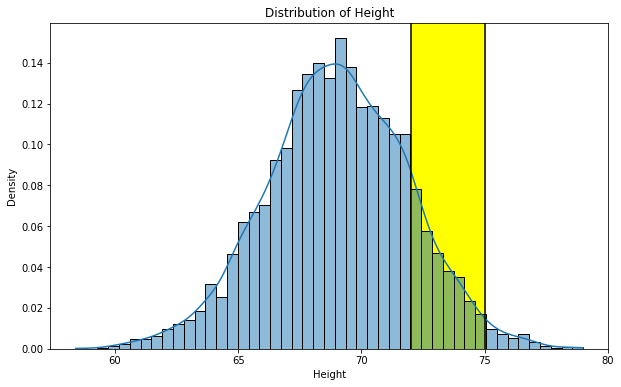

In [18]:
#set data
data = males["Height"]

#Set range
low = 72.0
high = 75.0

#plot
plot_dist(data, low, high)

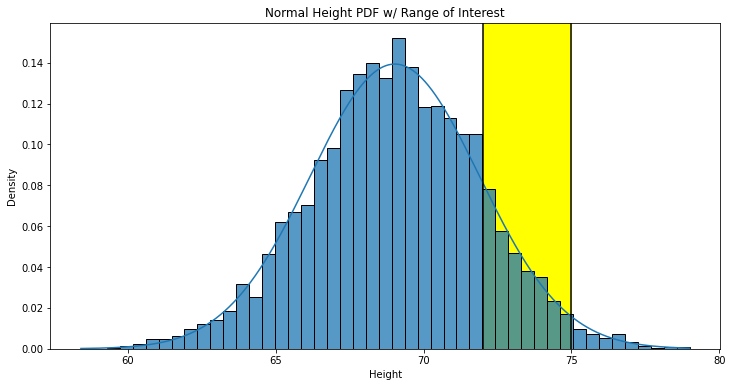

In [19]:
plot_pdf_normal(data,low, high)

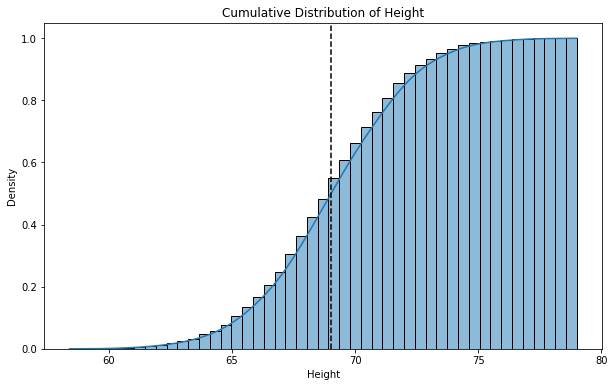

In [23]:
plot_cdf(data)

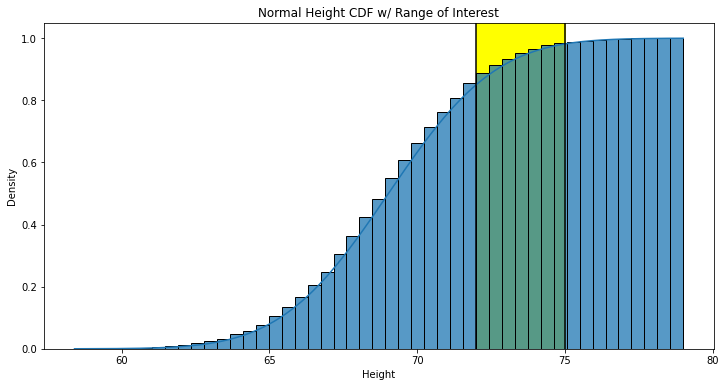

In [20]:
plot_cdf_normal(data,low, high)

In [21]:
## we subtract to find the probability of a value occurring in the range
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data) 

#Probability in the male range of height
stats.norm.cdf(high, loc=mean,scale=std) - stats.norm.cdf(low,loc=mean, scale=std)


0.13102113741991472

In [22]:
#Probability less than equal to the low end of male height range selection
stats.norm.cdf(low, loc=mean,scale=std)

0.8505097555604745